In [21]:
Dir_Main = "/Users/seanlin/Desktop/Python for AAE 625/Class 625/AAE625_25/Week_1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df_air = pd.read_csv(Dir_Main + "/Airpassengers.csv")
df_air.columns = ['Date', 'Passengers']
df_air['Date'] = pd.to_datetime(df_air['Date'])
df_air.tail()

,Date,Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


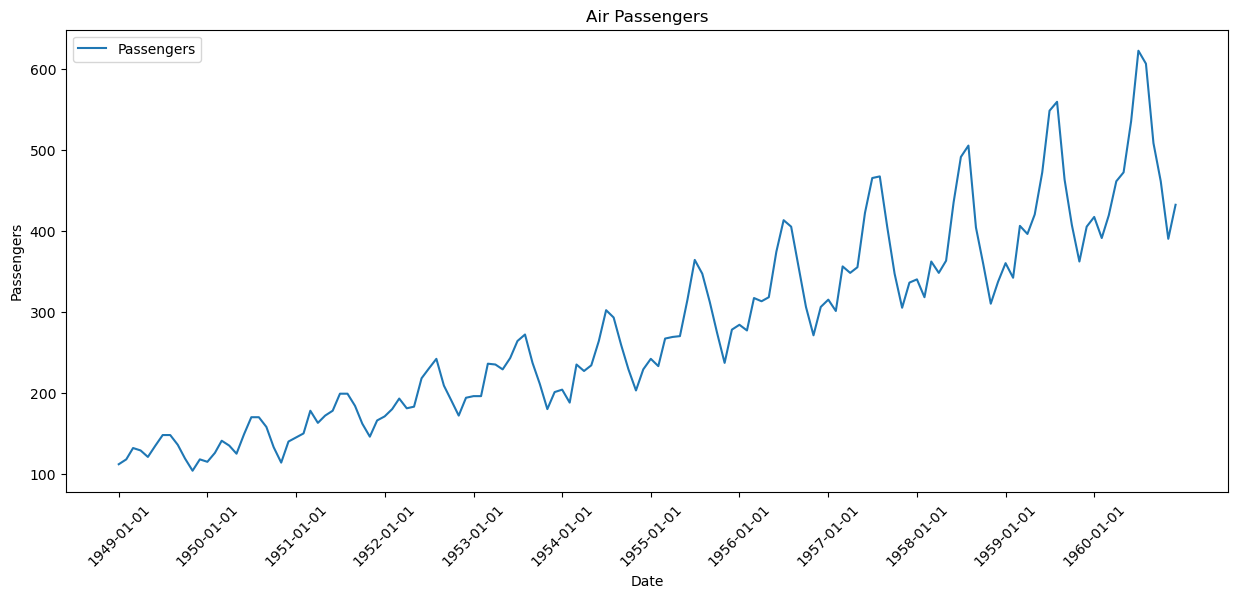

In [22]:
# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(df_air['Date'], df_air['Passengers'], label='Passengers')
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.xticks(df_air['Date'][::12], rotation=45)
plt.legend()
plt.show()

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
df_air['T'] = np.arange(len(df_air))+1
df_air.head()
X = df_air['T']
y = df_air['Passengers']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           4.02e-61
Time:                        17:49:07   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.6528      7.716     11.359      0.0

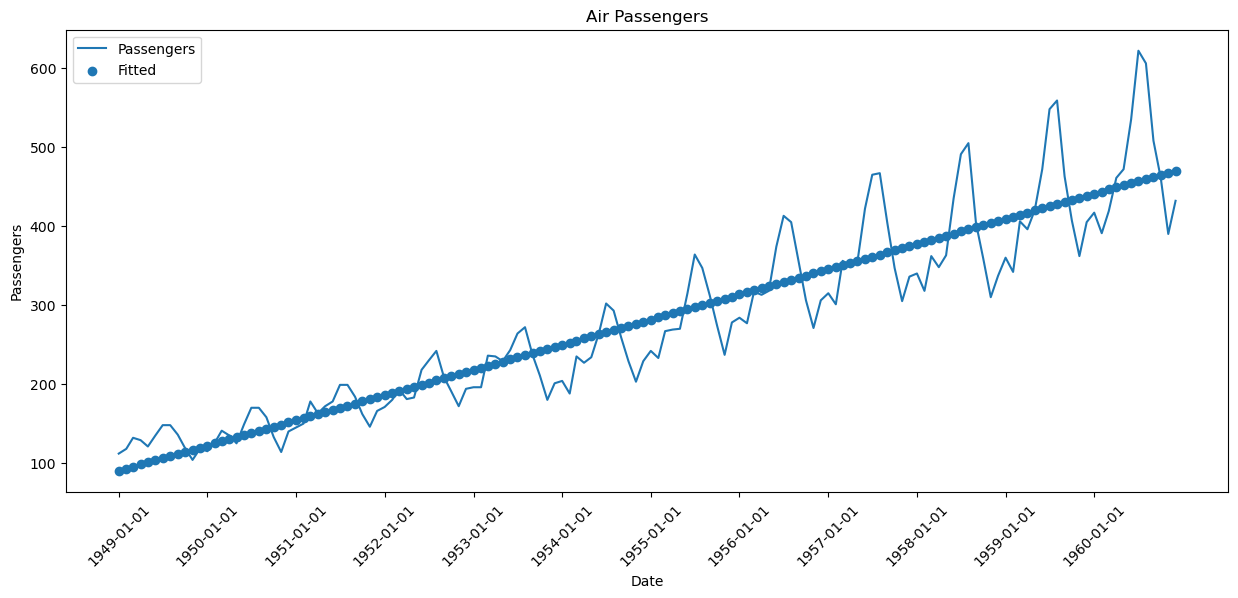

In [24]:
df_air['Fitted'] = results.fittedvalues
plt.figure(figsize=(15, 6))
plt.plot(df_air['Date'], df_air['Passengers'], label='Passengers')
plt.scatter(df_air['Date'], df_air['Fitted'], label='Fitted')
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.xticks(df_air['Date'][::12], rotation=45)
plt.legend()
plt.show()

/var/folders/zj/rkprz0jx1v30c3j0sskrgqh00000gn/T/ipykernel_14299/3077452358.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='1961-01-01', periods=12, freq='M')


         Date  Predicted_Passengers
0  1961-01-31            449.255682
1  1961-02-28            442.505682
2  1961-03-31            477.672348
3  1961-04-30            474.589015
4  1961-05-31            479.339015
5  1961-06-30            519.172348
6  1961-07-31            558.839015
7  1961-08-31            558.589015
8  1961-09-30            509.922348
9  1961-10-31            474.089015
10 1961-11-30            440.339015
11 1961-12-31            469.339015


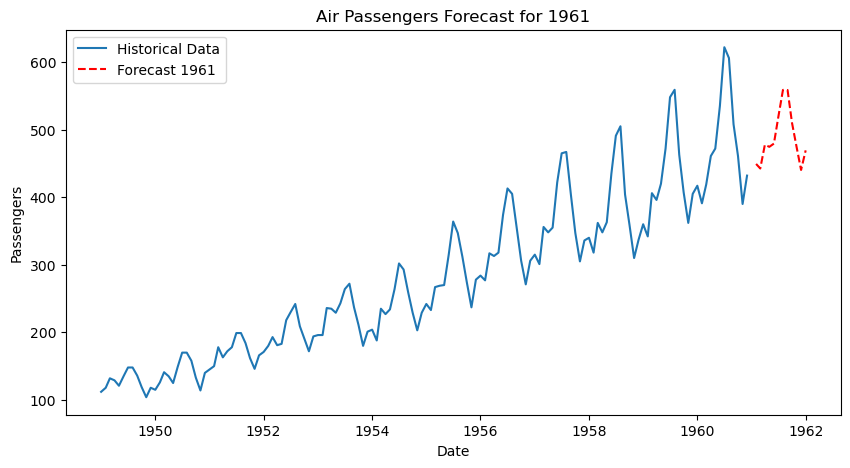

In [35]:
# Generate new dates for 1961
forecast_dates = pd.date_range(start='1961-01-01', periods=12, freq='M')

# Generate the trend values (continuing from the last known value)
T_1961 = np.arange(df_air['T'].max() + 1, df_air['T'].max() + 13)

# Generate month dummies for 1961
month_dummies_1961 = np.zeros((12, 12))
for i in range(12):
    month_dummies_1961[i, i] = 1 

# Create a dataframe for 1961 predictions
df_1961 = pd.DataFrame({'Date': forecast_dates, 'T': T_1961})
for i in range(12):
    df_1961[f'm{i+1}'] = month_dummies_1961[:, i]

# Define independent variables for prediction
X_1961 = df_1961[['T'] + [f'm{i+1}' for i in range(12)]]

# Predict passenger numbers for 1961 using the fitted model
df_1961['Predicted_Passengers'] = results_T_S.predict(X_1961)

# Display forecasted values
print(df_1961[['Date', 'Predicted_Passengers']])

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df_air['Date'], df_air['Passengers'], label='Historical Data')
plt.plot(df_1961['Date'], df_1961['Predicted_Passengers'], label='Forecast 1961', linestyle='dashed', color='red')
plt.legend()
plt.title('Air Passengers Forecast for 1961')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Export to CSV
df_export = pd.concat([df_air[['Date', 'Passengers']], 
                       df_1961[['Date', 'Predicted_Passengers']].rename(columns={'Predicted_Passengers': 'Passengers'})])
df_export.to_csv("air_passengers_forecast_1961.csv", index=False)